# Predición de elegibilidad de una tarjeta de credito

Se utilizara un dataseet extraido de Kaggle para predecir que tan riesgoso es aprobar una tarjeta a un individuo tomando en cuenta diversos factores individualistas como si cuenta con carro, alguna propiedad entre otros.

## Diccionario de datos

**ID**: Identificador único de cada individuo.

**Gender**: Género del individuo (p. ej., Masculino, Femenino)

**Has a car**: Si el individuo es propietario de automóvil (Sí/No)

**Has a property**: Si el individuo posee propiedad (Sí/No)

**Children count**: Número de hijos que tiene el individuo.

**Income**: Ingresos del individuo.

**Employment status**: situación laboral actual del individuo. 

**Education level**: Nivel más alto de educación alcanzado por el individuo. 

**Marital status**: Estado civil del individuo. 

**Dwelling**: Tipo de vivienda en la que reside el individuo. 

**Age**: Edad de individuo.

**Employment length**: tiempo que el individuo ha estado trabajando.

**Has a mobile phone**: Si la persona tiene teléfono móvil.

**Has a work phone**: Si la persona tiene teléfono del trabajo.

**Has a phone**: Si el individuo tiene teléfono.

**Has an email**: Si el individuo tiene correo electrónico.

**Job title**: Título del puesto de trabajo.

**Family member count**: número de familiares que tiene.

**Account age**: Antigüedad de la cuenta.

**Is high risk**: Variable objetivo que indica si el individuo se considera de alto riesgo para la elegibilidad de una tarjeta de crédito (0/1).

### Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

### Cargar Dataseets

In [2]:
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")

#Crear un nuevo Dataframe con todos los valores para aumentar el volumen de los datos
df=pd.concat([train,test])

### Analisis exploratorio de los datos

In [3]:
#Vistazo al dataframe
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [4]:
#Tamaño del dataframe
print("Filas:",df.shape[0])
print("Columnas:",df.shape[1])

Filas: 36457
Columnas: 20


In [5]:
#Informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36457 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null  int64

In [6]:
#Estadisticas del dataframe
df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [7]:
#valores nulos del dataframe
df.isnull().sum()

ID                         0
Gender                     0
Has a car                  0
Has a property             0
Children count             0
Income                     0
Employment status          0
Education level            0
Marital status             0
Dwelling                   0
Age                        0
Employment length          0
Has a mobile phone         0
Has a work phone           0
Has a phone                0
Has an email               0
Job title              11323
Family member count        0
Account age                0
Is high risk               0
dtype: int64

### Limpieza de datos y procesado de datos

In [8]:
#Imputar como anonimo los trabajos que no declarados
df["Job title"].fillna("anonymous",inplace=True)

In [9]:
#Codificar las variables categoricas para convertirlas en numericas
columnsencode=df.select_dtypes(include=['object']).columns
for column in columnsencode:
    df[column]=LabelEncoder().fit_transform(df[column])

In [10]:
#Ahora hay solamente variables numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36457 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  int32  
 2   Has a car            36457 non-null  int32  
 3   Has a property       36457 non-null  int32  
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  int32  
 7   Education level      36457 non-null  int32  
 8   Marital status       36457 non-null  int32  
 9   Dwelling             36457 non-null  int32  
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null  int64

In [11]:
#Realizar tabla de correlacion
df.corr()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
ID,1.000000,0.012022,-0.011163,-0.098851,0.028878,-0.017667,0.023193,-0.009211,-0.004336,0.020613,0.056016,-0.038043,NaN,0.079215,0.009879,-0.046979,-0.009127,0.026624,0.001364,0.015588
Gender,0.012022,1.000000,0.361379,-0.050758,0.077690,0.197805,0.105639,0.005880,-0.099289,0.070301,0.202352,-0.173434,NaN,0.064994,-0.026833,-0.003284,-0.130181,0.110782,0.005079,0.015292
Has a car,-0.011163,0.361379,1.000000,-0.015185,0.105839,0.215506,0.054817,-0.101272,-0.121716,0.016337,0.157144,-0.156452,NaN,0.021644,-0.014019,0.021750,-0.119776,0.151814,-0.029627,-0.004341
Has a property,-0.098851,-0.050758,-0.015185,1.000000,-0.000575,0.032719,-0.046543,0.010997,0.022993,-0.179187,-0.129838,0.093006,NaN,-0.207732,-0.066601,0.052194,0.048800,-0.005723,0.006476,-0.022247
Children count,0.028878,0.077690,0.105839,-0.000575,1.000000,0.033691,0.109401,-0.049823,-0.160386,0.023302,0.339357,-0.229379,NaN,0.048091,-0.016291,0.015960,-0.134796,0.889114,-0.003984,-0.000308
Income,-0.017667,0.197805,0.215506,0.032719,0.033691,1.000000,-0.072974,-0.226931,-0.001191,-0.006480,0.067908,-0.168611,NaN,-0.037746,0.017245,0.086681,-0.091777,0.023750,-0.017494,-0.001057
Employment status,0.023193,0.105639,0.054817,-0.046543,0.109401,-0.072974,1.000000,0.057225,-0.048532,0.035694,0.213509,-0.363363,NaN,0.165785,0.006529,-0.019567,-0.204559,0.109313,-0.000846,-0.006049
Education level,-0.009211,0.005880,-0.101272,0.010997,-0.049823,-0.226931,0.057225,1.000000,0.007747,-0.036322,-0.169024,0.121874,NaN,-0.021092,-0.044875,-0.098457,0.081714,-0.041344,0.014839,-0.005215
Marital status,-0.004336,-0.099289,-0.121716,0.022993,-0.160386,-0.001191,-0.048532,0.007747,1.000000,0.010025,-0.106486,0.120113,NaN,-0.063103,-0.015065,-0.010895,0.055781,-0.546511,0.030053,0.021266
Dwelling,0.020613,0.070301,0.016337,-0.179187,0.023302,-0.006480,0.035694,-0.036322,0.010025,1.000000,0.211562,-0.107957,NaN,0.030080,-0.020254,0.012879,-0.065115,0.003805,0.030031,-0.000281


In [12]:
#Se observa que las columnas "Children count" , "Dwelling", "Has a mobile phone" tienen menor correlacion 
#Se eliminan estas columnas, asi como columnas innecesarias como "ID"
df.drop(columns=["Children count" , "Dwelling", "Has a mobile phone","ID"],inplace=True)

<Axes: >

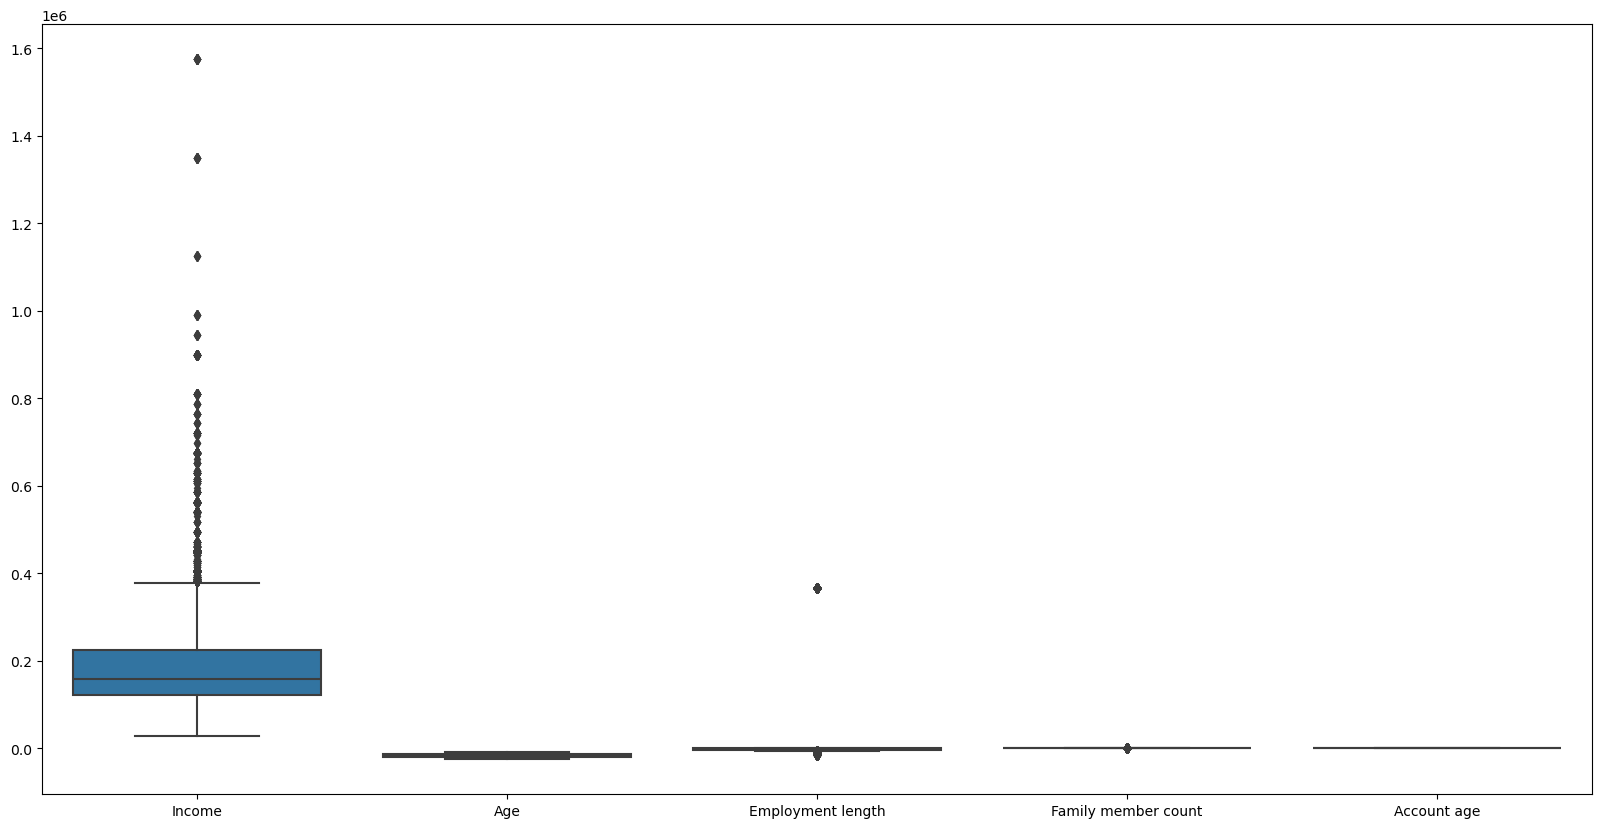

In [13]:
#Se hace un boxplot de las variables numericas (no categoricas)
plt.figure(figsize=(20, 10))
sns.boxplot(df.drop(columns=['Gender','Has a car','Has a property','Employment status',
                             'Education level','Marital status','Job title',"Has a work phone","Has a phone","Has an email","Is high risk"]))

In [14]:
#Se eliminan los valores atipicos que generan dispersion en los datos
#Se opta por dejar los cercanos a los limites para evitar perder volumen de datos
Q1=df["Employment length"].quantile(0.25)
Q3=df["Employment length"].quantile(0.75)
IQR=Q3-Q1
BS=(Q3+1.5*IQR)

df=df[df['Employment length'] < BS]



In [15]:
Q1=df["Income"].quantile(0.25)
Q3=df["Income"].quantile(0.75)
IQR=Q3-Q1
BI=(Q1-1.5*IQR)
BS=(Q3+1.5*IQR)

df=df[(df['Income'] > BI) & (df['Income'] < BS)]

<Axes: >

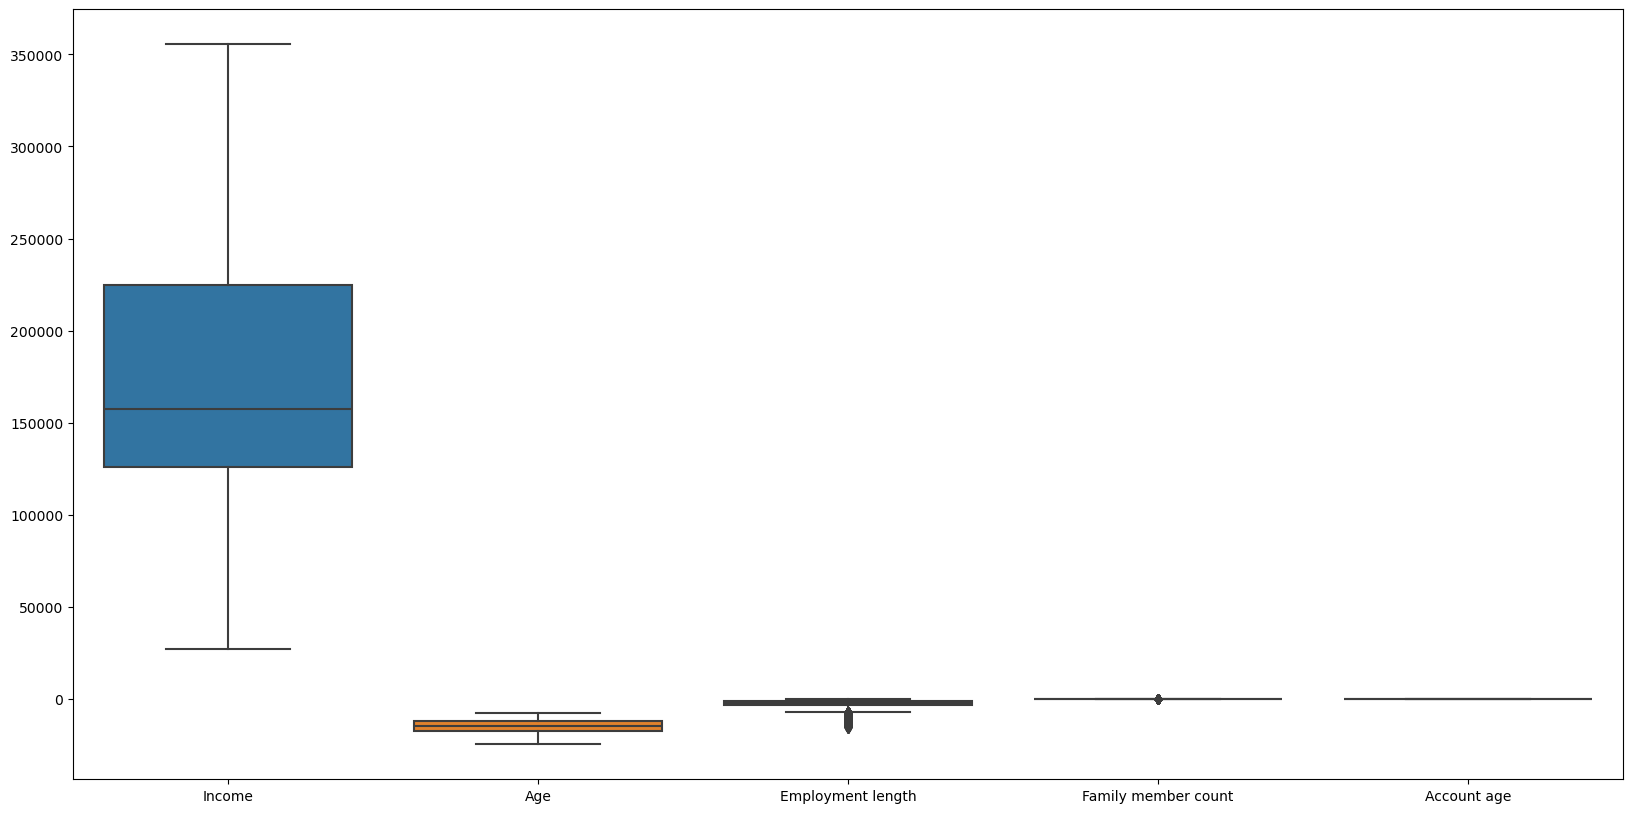

In [16]:
#Se hace un boxplot de las variables numericas (no categoricas)
plt.figure(figsize=(20, 10))
sns.boxplot(df.drop(columns=['Gender','Has a car','Has a property','Employment status',
                             'Education level','Marital status','Job title',"Has a work phone","Has a phone","Has an email","Is high risk"]))

<BarContainer object of 2 artists>

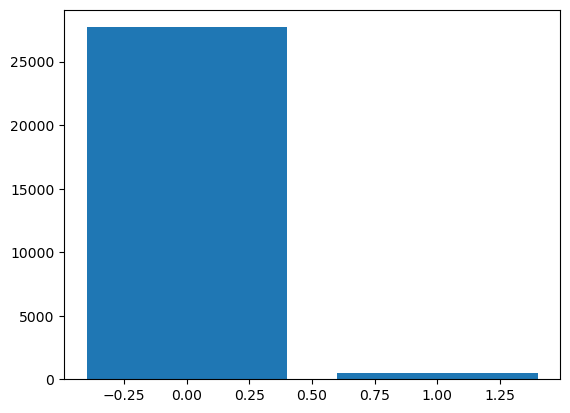

In [17]:
#Graficar la variable objetivo
plt.bar([0,1],df["Is high risk"].value_counts())

In [18]:
#Balancear la variable objetivo, ya que como se ve en la grafica anterior, hay bastante desbalance
X=df.drop(columns=["Is high risk"])
y=df["Is high risk"]

ADASYN(random_state=42)
X_over, y_over = ADASYN(random_state=42).fit_resample(X, y)
X_over

,Gender,Has a car,Has a property,Income,Employment status,Education level,Marital status,Age,Employment length,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age
0,1,1,1,135000.0,4,4,1,-16271,-3111,0,0,0,3,2.000000,-17.000000
1,0,1,0,135000.0,0,1,3,-10130,-1651,0,0,0,0,2.000000,-1.000000
2,0,0,1,180000.0,0,4,1,-12821,-5657,0,0,0,8,4.000000,-38.000000
3,0,0,0,270000.0,4,4,2,-16207,-515,0,1,0,18,1.000000,-41.000000
4,0,1,1,135000.0,4,4,1,-13251,-3839,1,0,0,0,2.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55418,0,0,0,112500.0,1,3,1,-15708,-2620,1,0,0,16,2.985642,-44.956927
55419,0,0,0,112500.0,4,3,1,-16173,-988,1,0,0,4,3.081563,-58.673747
55420,0,0,0,112500.0,1,3,1,-15732,-2633,1,0,0,16,2.803836,-27.574249
55421,0,0,0,112500.0,3,2,1,-15476,-2487,1,0,0,14,4.772255,-48.570719


<BarContainer object of 2 artists>

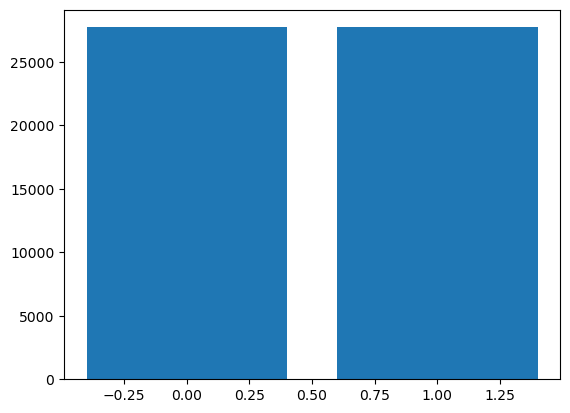

In [19]:
#Se observa la variable objetivo balanceada
plt.bar([0,1],y_over.value_counts())

In [20]:
#Dividir los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, train_size=0.8, random_state=42, shuffle=True)

## Modelos de Machine Learning

### C-Support Vector Classification (SVC)

In [21]:
#Aplicacion del modelo de ML
svclassifier = SVC(max_iter=500)

#Ajustar el modelo
svclassifier.fit(X_train,y_train)

#Hacer las predicciones
y_pred = svclassifier.predict(X_test)

In [22]:
#Validacion del modelo
precisionsvc = precision_score(y_test, y_pred)
print('Precision', precisionsvc)

recallsvc = recall_score(y_test, y_pred)
print('Recall:', recallsvc)

f1svc = 2 * (precisionsvc * recallsvc) / (precisionsvc + recallsvc)
print("F1 Score:", f1svc)


Precision 0.5022132287846213
Recall: 0.7165283291230603
F1 Score: 0.5905271767417652


### Decision Tree Classifier

In [23]:
#Aplicacion del modelo de ML
DTC = DecisionTreeClassifier()

#Ajustar el modelo
DTC.fit(X_train, y_train)

#Hacer las predicciones
y_pred = DTC.predict(X_test)

In [24]:
#Validacion del modelo
precisiondtc = precision_score(y_test, y_pred)
print('Precision', precisiondtc)

recalldtc = recall_score(y_test, y_pred)
print('Recall:', recalldtc)

f1dtc = 2 * (precisiondtc * recalldtc) / (precisiondtc + recalldtc)
print("F1 Score:", f1dtc)

Precision 0.970519921386457
Recall: 0.9801515698303861
F1 Score: 0.9753119669629231


### KNeighborsClassifier

In [25]:
#Aplicacion del modelo de ML
KNN = KNeighborsClassifier()

#Ajustar el modelo
KNN.fit(X_train,y_train)

#Hacer las predicciones
y_pred = KNN.predict(X_test)

In [26]:
#Validacion del modelo
precisionknn = precision_score(y_test, y_pred)
print('Precision', precisionknn)

recallknn = recall_score(y_test, y_pred)
print('Recall:', recallknn)

f1knn = 2 * (precisionknn * recallknn) / (precisionknn + recallknn)
print("F1 Score:", f1knn)

Precision 0.9160802251935257
Recall: 0.9395525081198124
F1 Score: 0.9276679137716017


## Comparativa de modelos

In [27]:
precision=pd.DataFrame({"Categories":["SVC","Decision Tree","KNN"],"Values":[(100*precisionsvc),(100*precisiondtc),(100*precisionknn)]})

Text(0, 0.5, 'Percent of precision')

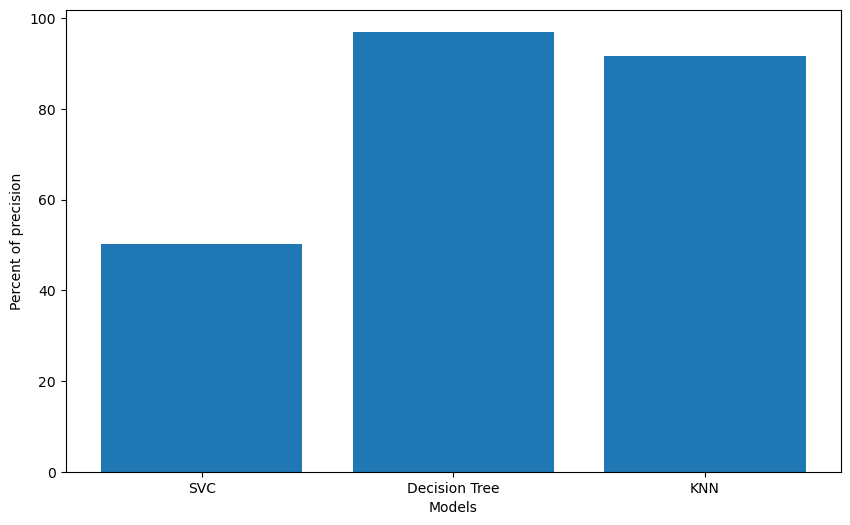

In [28]:
#Crear la gráfica de barras comparativa
plt.figure(figsize=(10, 6))
plt.bar(precision['Categories'], precision['Values'])
plt.xlabel('Models')
plt.ylabel('Percent of precision')

## Conclusión

Podemos observar que el modelo de Decision Tree es el que cuenta con el mayor porcentaje de precision siendo de casi el 97% de precisión, mientras que el SVC solamente tiene un 50%.
En estos casos no se estan tomando en cuenta los mejores hiperparametros que podrian utilizarse para este caso en especifico, pero aun asi se obtuvieron muy buenos resultados.

In [8]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
